# EDA de notre dataset

## Description des données

In [1]:
import pandas as pd

#  Remplace 'data.csv' par le chemin de ton fichier
file_path = "x_train_final_asAbTs5.csv" 
#file_path = "y_train_final_YYyFil7.csv"
df = pd.read_csv(file_path,)


#  Afficher les premières lignes du dataset
print("\n🔹 Aperçu des premières lignes :")
print(df.head())

#  Infos générales sur le dataset
print("\n🔹 Infos sur le dataset :")
print(df.info())

#  Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n🔹 Statistiques descriptives :")
print(df.describe())

#  Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes :")
print(df.isnull().sum())

#  Afficher les types de colonnes
print("\n🔹 Types des colonnes :")
print(df.dtypes)

#  Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔹 Valeurs uniques des colonnes catégorielles :")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")

#  Nombre de doublons
print("\n🔹 Nombre de doublons :")
print(df.duplicated().sum())



🔹 Aperçu des premières lignes :
   Unnamed: 0  total_count  longitude_scaled  latitude_scaled  Precipitations  \
0           0            1          0.998417         0.996118             0.0   
1           1           35          0.999222         0.996000             0.0   
2           2            3          0.998371         0.996309             1.8   
3           3            1          0.998804         0.996343             0.0   
4           4            2          0.999126         0.996417             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  
0           0.0         14.6        2.5            3              4     8  
1           0.0         22.4        3.1            5              3    13  
2           0.0         11.7        3.3            4             10     8  
3           0.0         28.6        2.6            4              2    16  
4           0.0          9.6        3.2            3              9    18  

🔹 Infos sur le dataset 

## Visualisation des valeurs manquantes et distributions des valeurs

🔹 Valeurs manquantes dans x_train :


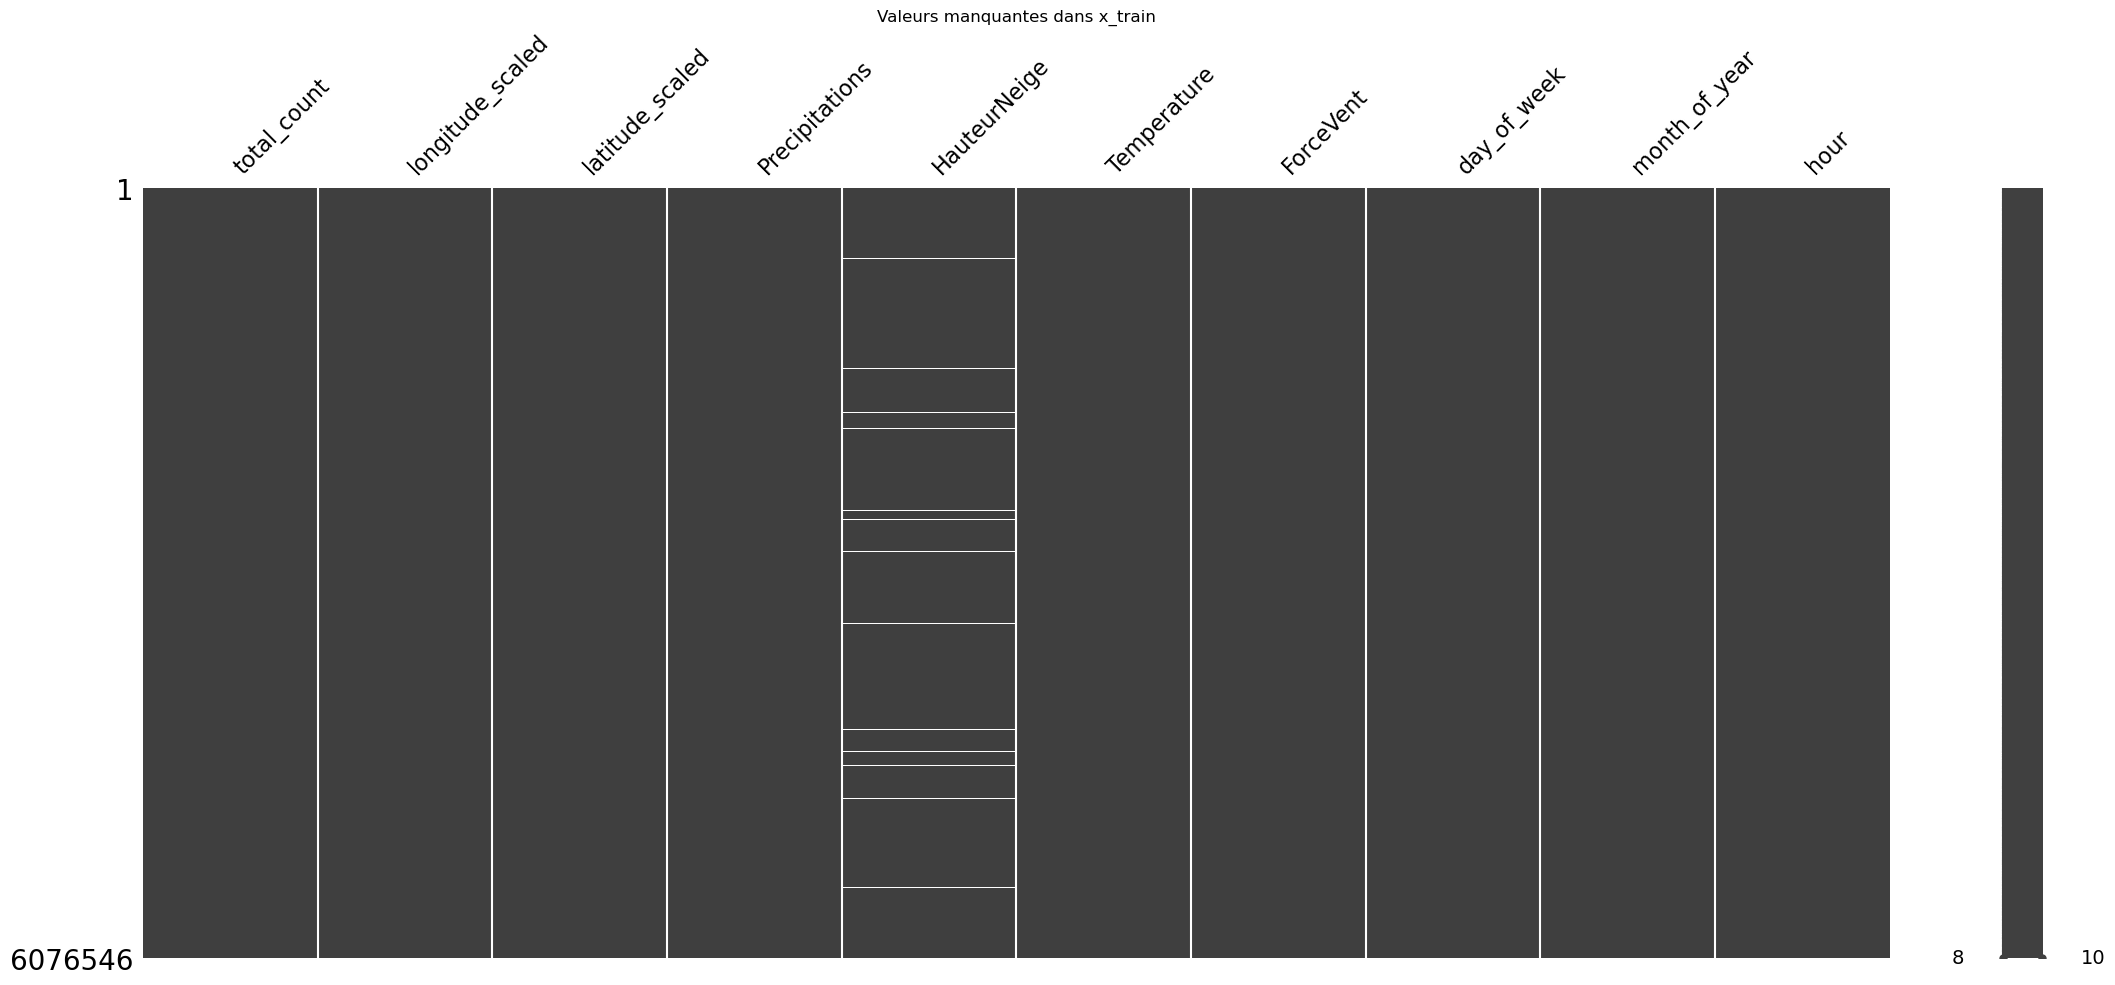

🔹 Valeurs manquantes dans y_train :


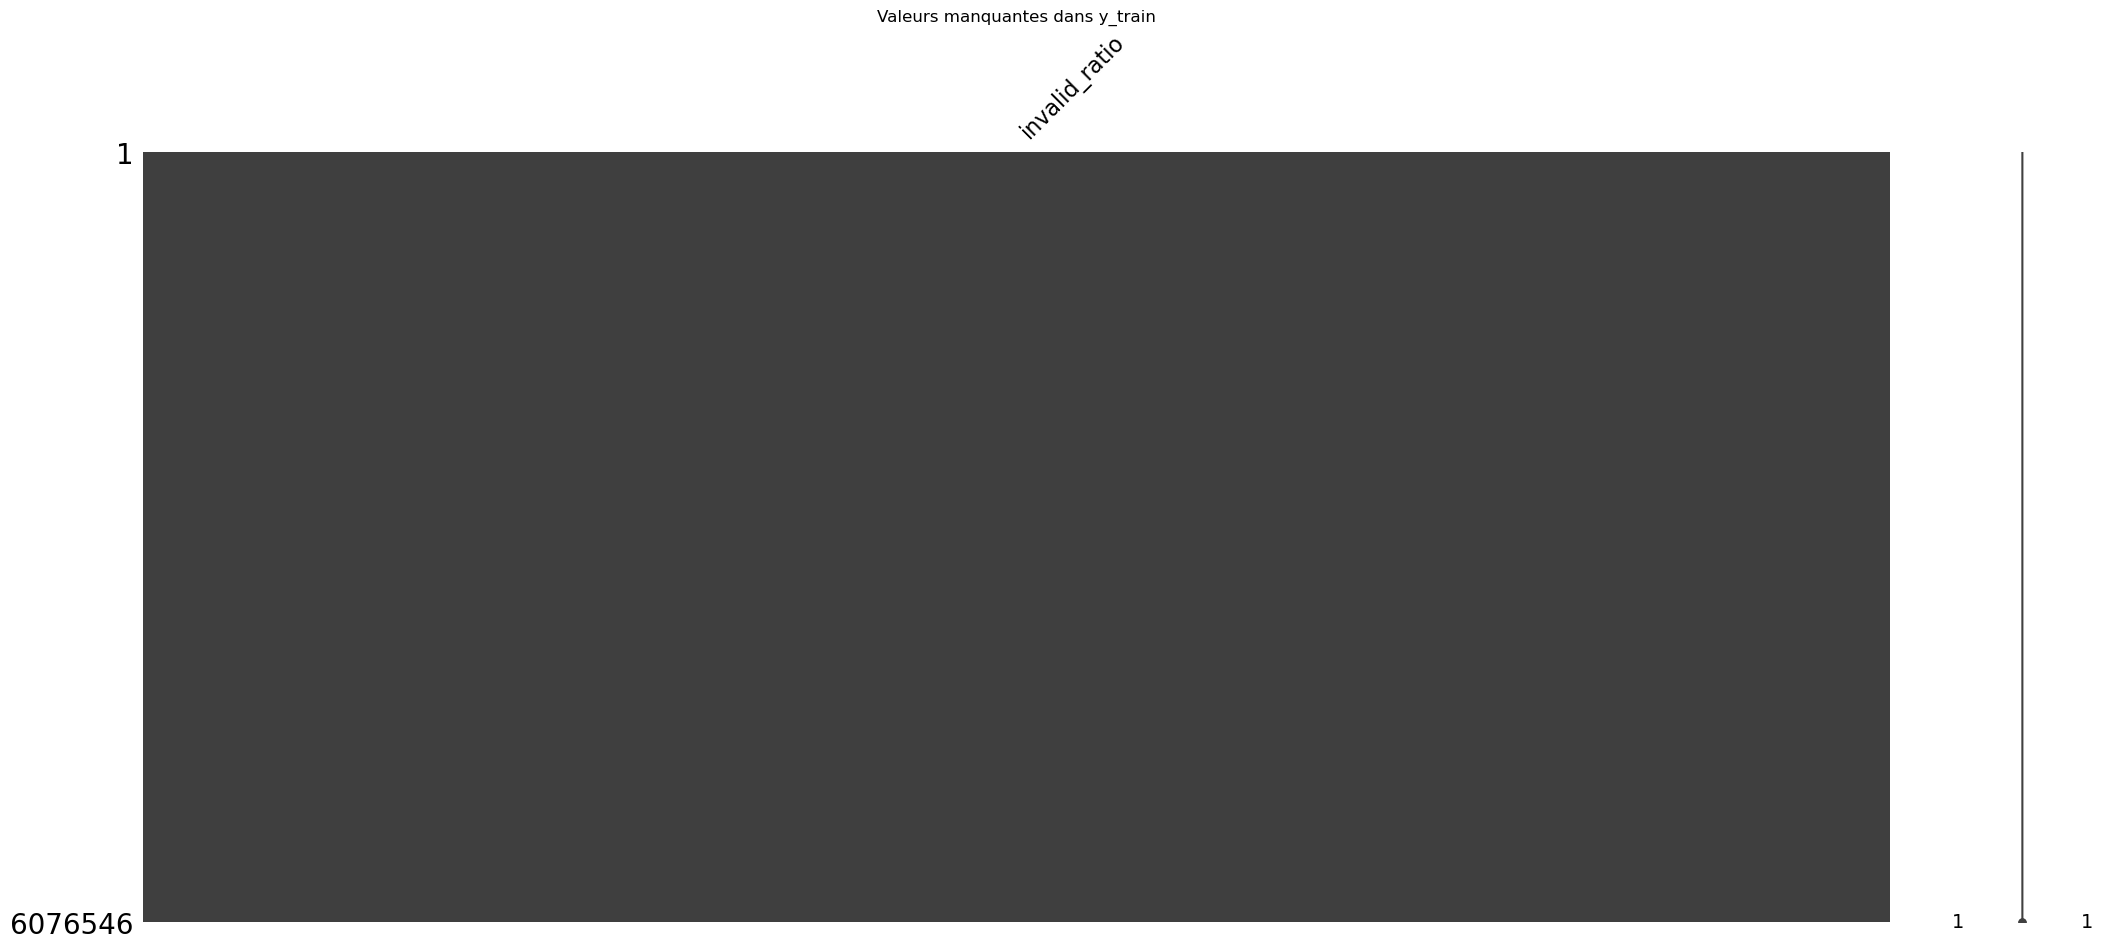

🔹 Distribution des données dans x_train :


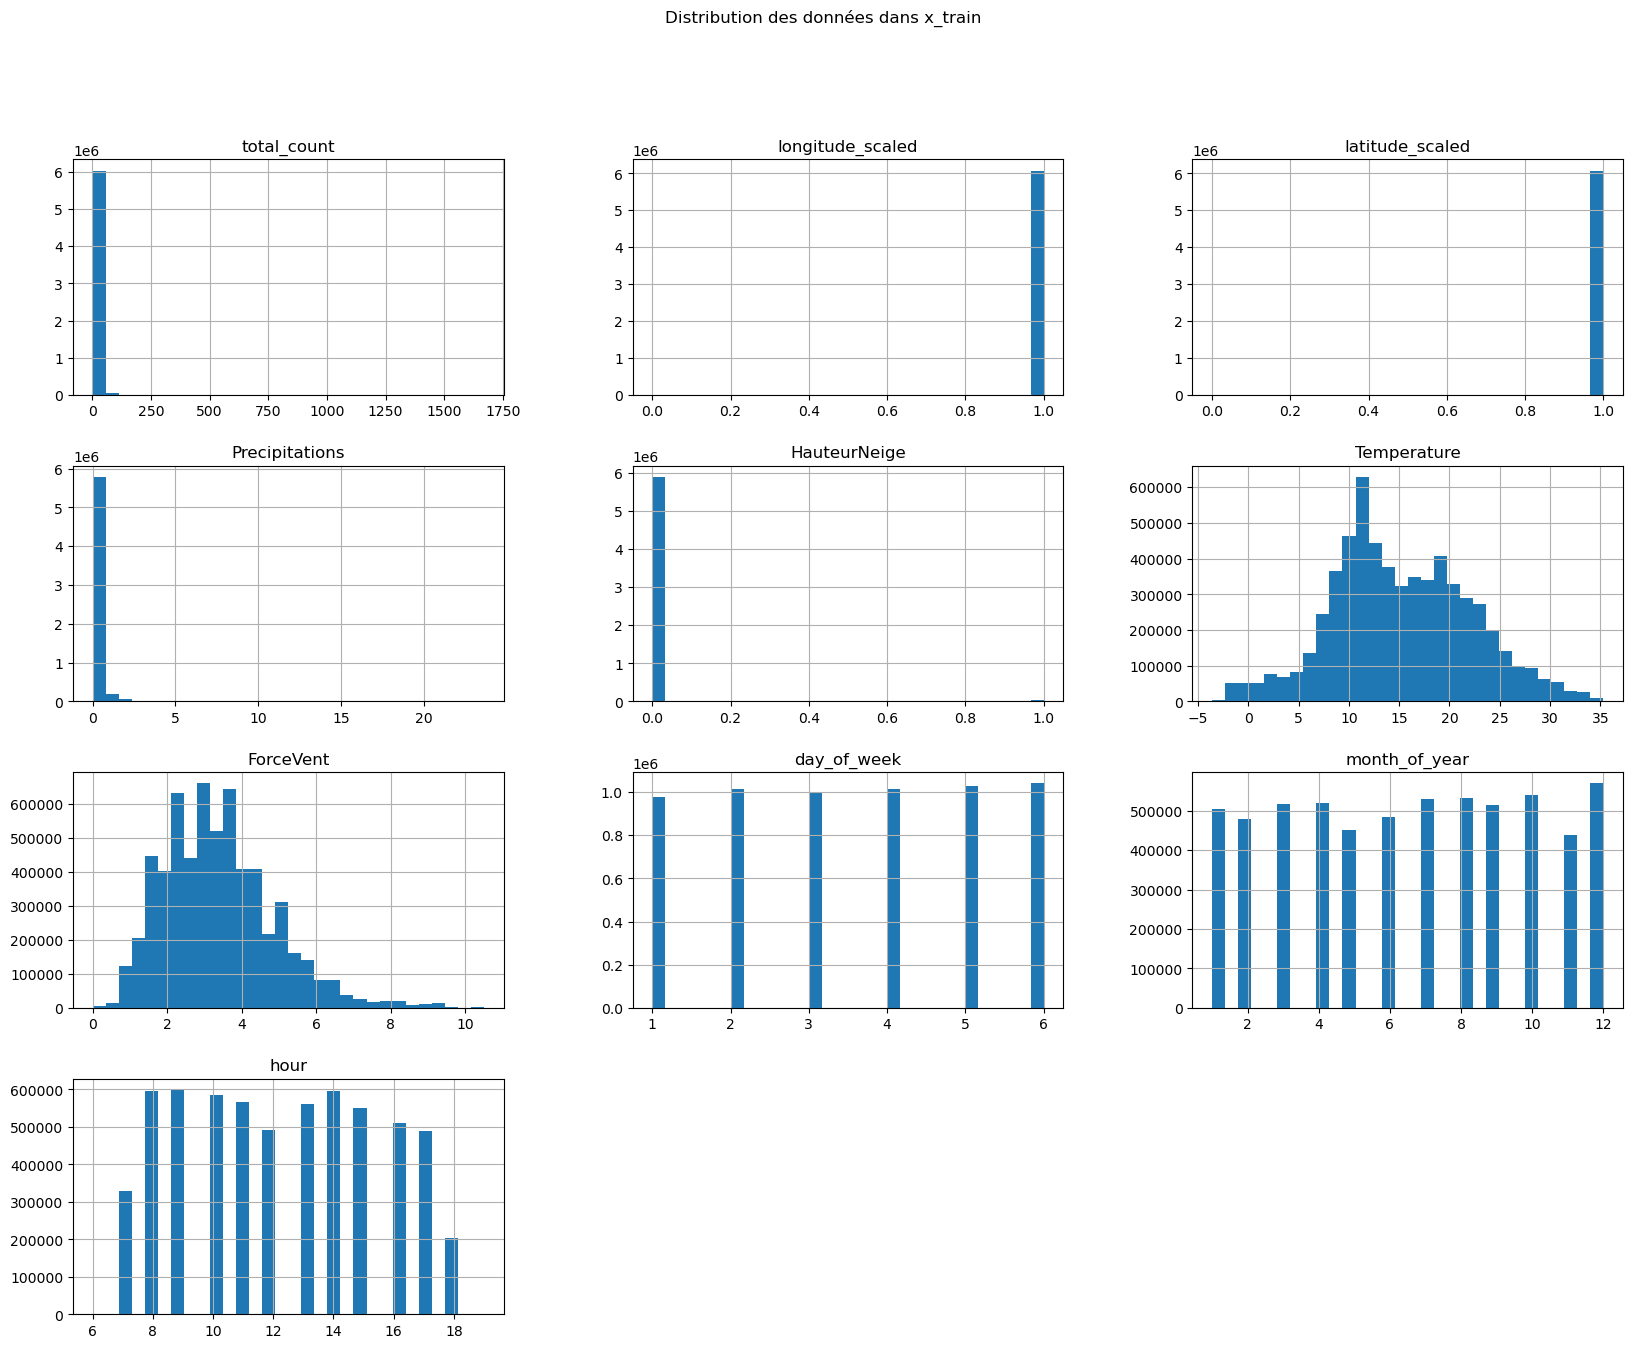

🔹 Distribution des données dans y_train :


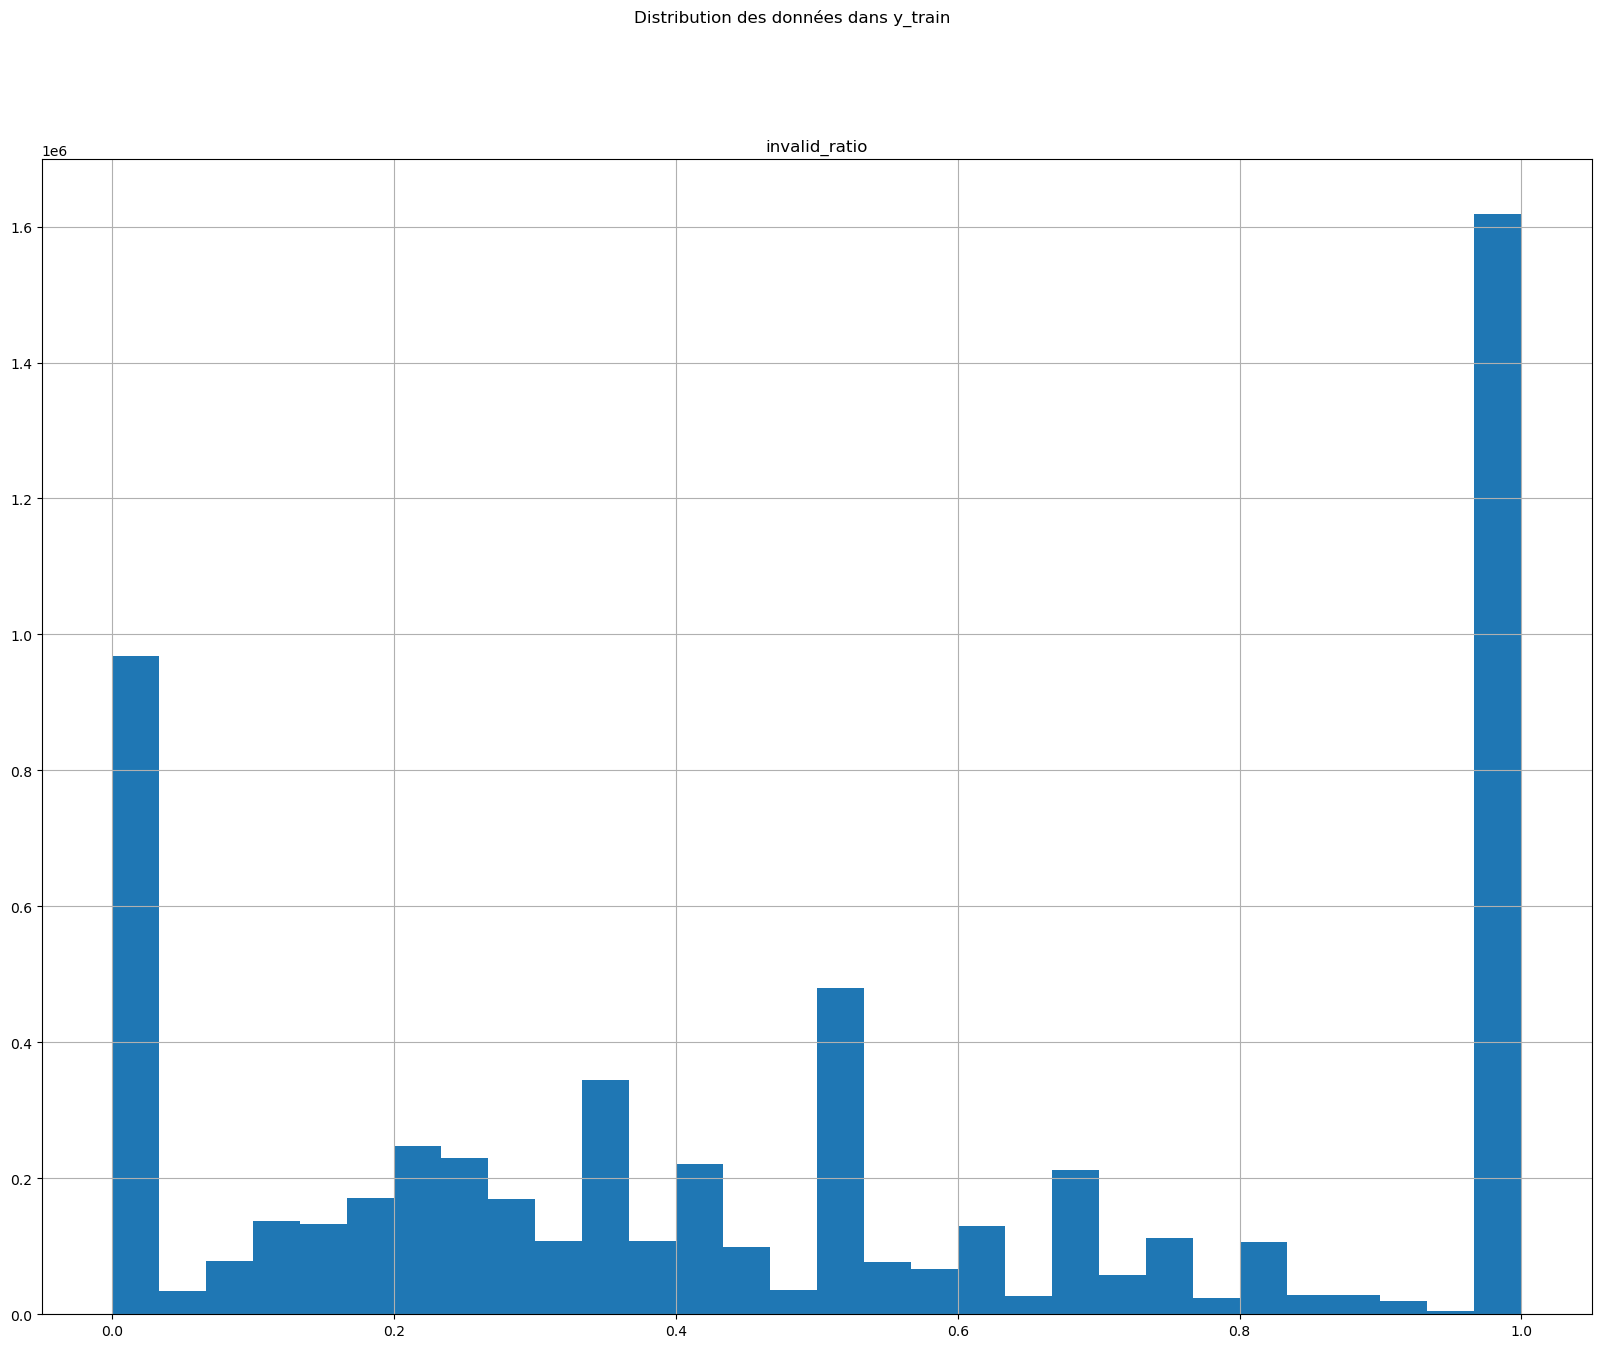

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Lire les fichiers CSV en utilisant la première colonne comme index
x_train_path = "x_train_final_asAbTs5.csv"
y_train_path = "y_train_final_YYyFil7.csv"

x_train = pd.read_csv(x_train_path, index_col=0)
y_train = pd.read_csv(y_train_path, index_col=0)

# Visualiser les valeurs manquantes avec missingno
def plot_missing_values(df, title):
    msno.matrix(df)
    plt.title(title)
    plt.show()

print("🔹 Valeurs manquantes dans x_train :")
plot_missing_values(x_train, "Valeurs manquantes dans x_train")

print("🔹 Valeurs manquantes dans y_train :")
plot_missing_values(y_train, "Valeurs manquantes dans y_train")

# Tracer des histogrammes pour chaque colonne
def plot_histograms(df, title):
    df.hist(bins=30, figsize=(20, 15))
    plt.suptitle(title)
    plt.show()

print("🔹 Distribution des données dans x_train :")
plot_histograms(x_train, "Distribution des données dans x_train")

print("🔹 Distribution des données dans y_train :")
plot_histograms(y_train, "Distribution des données dans y_train")


## Recherche des valeurs égales à 0 ( notamment pour les latitudes et longitudes pour la détection d'erreur) et distribution de la latitude et longitude sans ces erreurs

Nombre de valeurs égales à 0.0 :
total_count               0
longitude_scaled          2
latitude_scaled           4
Precipitations      5301734
HauteurNeige        5887677
Temperature               0
ForceVent              6796
day_of_week               0
month_of_year             0
hour                      0
dtype: int64

Distribution des données (excluant les 0.0) :


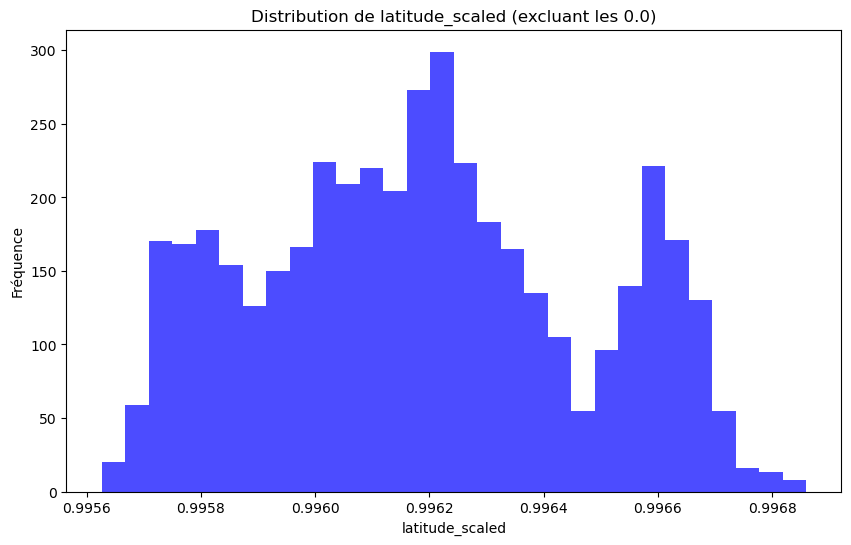

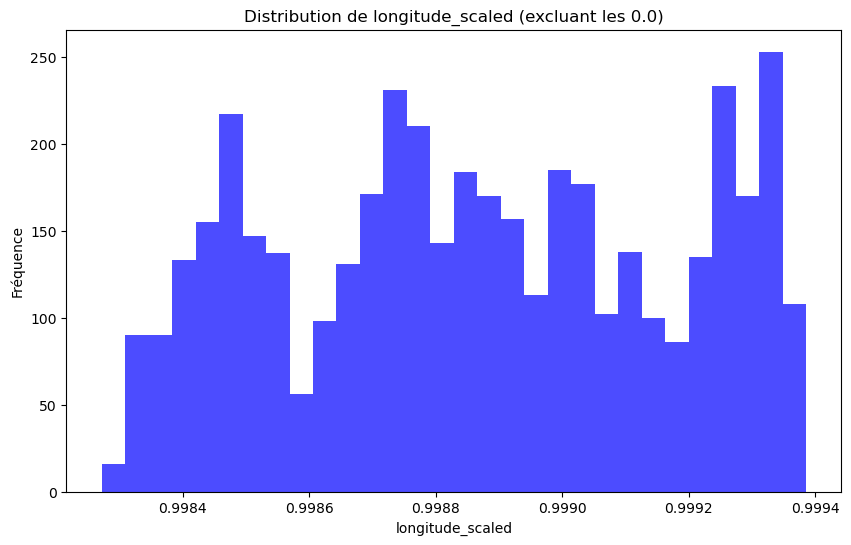

In [3]:
# Compter le nombre de valeurs égales à 0.0
zero_counts = x_train.eq(0.0).sum()

print("Nombre de valeurs égales à 0.0 :")
print(zero_counts)

# Exclure les valeurs égales à 0.0
df_non_zero = x_train[(x_train != 0.0).all(axis=1)]

# Tracer la distribution des données restantes
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution de {column_name} (excluant les 0.0)')
    plt.xlabel(column_name)
    plt.ylabel('Fréquence')
    plt.show()

print("\nDistribution des données (excluant les 0.0) :")
plot_distribution(df_non_zero, 'latitude_scaled')
plot_distribution(df_non_zero, 'longitude_scaled')

## Affichage des lignes avec ces erreurs de position

In [4]:
zero_lat_lon_rows = df[(df['latitude_scaled'] <= 0.95) | (df['longitude_scaled'] <= 0.95)]

print("Lignes avec latitude_scaled et longitude_scaled égales à 0.0 :")
print(len(zero_lat_lon_rows))
print(zero_lat_lon_rows)

Lignes avec latitude_scaled et longitude_scaled égales à 0.0 :
398
         Unnamed: 0  total_count  longitude_scaled  latitude_scaled  \
16359         16359            2          0.980778     2.039470e-07   
31566         31566            2          0.980778     2.039470e-07   
37122         37122           21          0.980778     2.039470e-07   
40463         40463            1          0.980778     0.000000e+00   
44401         44401            1          0.980778     2.039470e-07   
...             ...          ...               ...              ...   
6037035     6037035            4          0.980778     2.039470e-07   
6057257     6057257           41          0.980778     2.039470e-07   
6058224     6058224            1          0.980778     2.039470e-07   
6065802     6065802            1          0.980778     2.039470e-07   
6066407     6066407            2          0.980778     2.039470e-07   

         Precipitations  HauteurNeige  Temperature  ForceVent  day_of_week  \
16

## Affichage du pourcentage de points dans la même zone géographique (Paris)

In [5]:
import pandas as pd

# Chemin vers votre fichier CSV
x_train_path = "x_train_final_asAbTs5.csv"

# Lire le fichier CSV en utilisant la première colonne comme index
x_train = pd.read_csv(x_train_path, index_col=0)

# Vérifiez que les colonnes existent dans le DataFrame
if 'longitude_scaled' in x_train.columns and 'latitude_scaled' in x_train.columns:
    # Définir les limites géographiques approximatives de Paris
    paris_lat_min, paris_lat_max = 0.9955, 0.9975 # Exemple de limites pour la latitude scaled
    paris_lon_min, paris_lon_max = 0.998, 1.00  # Exemple de limites pour la longitude scaled

    # Compter les points à l'intérieur de la zone de Paris
    inside_paris = x_train[
        (x_train['latitude_scaled'] >= paris_lat_min) & (x_train['latitude_scaled'] <= paris_lat_max) &
        (x_train['longitude_scaled'] >= paris_lon_min) & (x_train['longitude_scaled'] <= paris_lon_max)
    ]

    # Compter les points à l'extérieur de la zone de Paris
    outside_paris = x_train[
        ~((x_train['latitude_scaled'] >= paris_lat_min) & (x_train['latitude_scaled'] <= paris_lat_max) &
          (x_train['longitude_scaled'] >= paris_lon_min) & (x_train['longitude_scaled'] <= paris_lon_max))
    ]

    # Calculer les proportions
    total_points = len(x_train)
    proportion_inside = len(inside_paris) / total_points
    proportion_outside = len(outside_paris) / total_points

    print(f"Proportion de points à l'intérieur de Paris : {proportion_inside:.5%}")
    print(f"Proportion de points à l'extérieur de Paris : {proportion_outside:.5%}")
else:
    print("Les colonnes 'longitude_scaled' et/ou 'latitude_scaled' n'existent pas dans le fichier.")


Proportion de points à l'intérieur de Paris : 99.99330%
Proportion de points à l'extérieur de Paris : 0.00670%


## Affichage des points autour de cette zone (Reconnaissance des frontières de Paris intra-muros)

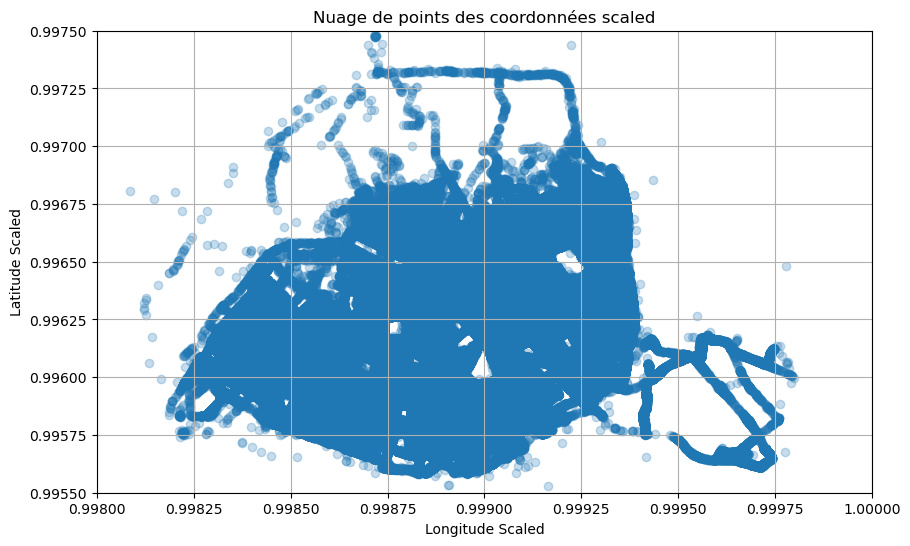

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers votre fichier CSV
x_train_path = "x_train_final_asAbTs5.csv"

# Lire le fichier CSV en utilisant la première colonne comme index
x_train = pd.read_csv(x_train_path, index_col=0)

# Vérifiez que les colonnes existent dans le DataFrame
if 'longitude_scaled' in x_train.columns and 'latitude_scaled' in x_train.columns:
    # Tracer le nuage de points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train['longitude_scaled'], x_train['latitude_scaled'], alpha=0.25)
    plt.title('Nuage de points des coordonnées scaled')
    plt.xlabel('Longitude Scaled')
    plt.ylabel('Latitude Scaled')
    # Définir les limites des axes pour zoomer
    plt.xlim(0.998, 1.00)  # Exemple de limites pour l'axe x
    plt.ylim(0.9955, 0.9975)  # Exemple de limites pour l'axe y
    plt.grid(True)
    plt.show()
else:
    print("Les colonnes 'longitude_scaled' et/ou 'latitude_scaled' n'existent pas dans le fichier.")


## Création de carte Folium et visualisation de 5000 points sur openstreetmap et calibration des coordonnées d'entrée (données normalisées) avec la vraie position géographique 

In [7]:
import pandas as pd
import folium


# Valeurs minimales et maximales réelles pour Paris
lat_min, lat_max = 48.8179, 48.9007
lon_min, lon_max = 2.26755, 2.4644

# Appliquer la transformation inverse
scaled_min_lat, scaled_max_lat = 0.99562, 0.99732
scaled_min_long, scaled_max_long = 0.99824, 0.99976

# Fonction pour inverser le Min-Max scaling
def inverse_min_max_scaling(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value) + min_value



x_train['latitude'] = x_train['latitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_lat) / (scaled_max_lat - scaled_min_lat), lat_min, lat_max))
x_train['longitude'] = x_train['longitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_long) / (scaled_max_long - scaled_min_long), lon_min, lon_max))

# Échantillonner 5 000 points
df_sample = x_train.sample(n=5000, replace=True, random_state=2)

# Créer une carte centrée sur Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les points échantillonnés à la carte
for _, row in df_sample.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)



# Sauvegarder la carte dans un fichier HTML
map_file = "paris_map_sample.html"
m.save(map_file)

print(f"Carte enregistrée sous le nom : {map_file}")


Carte enregistrée sous le nom : paris_map_sample.html


## Affichage de l'ensemble des points sur openstreetmap

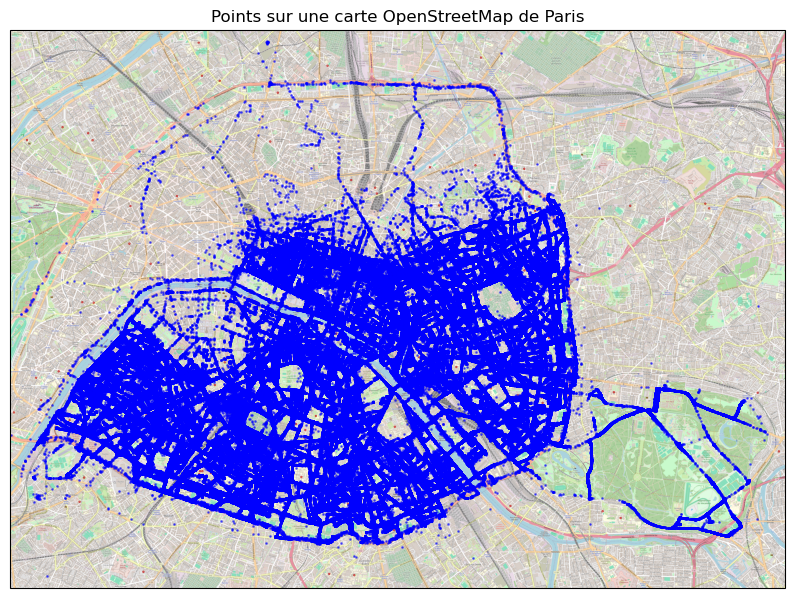

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
ax.add_image(osm_tiles, 15)

# Ajouter les points à la carte
ax.scatter(x_train['longitude'], x_train['latitude'], color='blue', s=1, alpha=0.5, transform=ccrs.Geodetic())

plt.title('Points sur une carte OpenStreetMap de Paris')
plt.show()

## Import du fichier des Arrondissements de Paris

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd


# Charger le fichier GeoJSON
gdf_paris = gpd.read_file('couronne_proche.geojson')
print('Traitement des points')
# Créer un GeoDataFrame à partir de x_train
geometry = [Point(xy) for xy in zip(x_train['longitude'], x_train['latitude'])]
geo_df = gpd.GeoDataFrame(x_train, geometry=geometry)
print('Traitement des zones')
# Déterminer quels points sont dans chaque zone géographique
geo_df['zone'] = None
for idx, zone in gdf_paris.iterrows():
    zone_name = zone.get('nom', {})
    if zone_name:
        mask = geo_df.within(zone['geometry'])
        geo_df.loc[mask, 'zone'] = zone_name
    else: 
        print(f"Feature at index {idx} does not have a 'nom' property.")

# Compter les points dans chaque zone
zone_counts = geo_df['zone'].value_counts()

# Compter les points en dehors de toutes les zones
outside_count = geo_df['zone'].isna().sum()

print("Nombre de points dans chaque zone géographique :")
print(zone_counts)
print("\nNombre de points en dehors de toutes les zones :")
print(outside_count)

# Calculer le total des points
total_points = len(geo_df)

# Calculer les pourcentages
zone_percentages = (zone_counts / total_points) * 100
outside_percentage = (outside_count / total_points) * 100

print("Pourcentage de points dans chaque zone géographique :")
print(zone_percentages)
print("\nPourcentage de points en dehors de toutes les zones :")
print(outside_percentage)


Traitement des points
Traitement des zones
Nombre de points dans chaque zone géographique :
zone
Paris 15e  Arrondissement    1524144
Paris 13e  Arrondissement     723549
Paris 14e  Arrondissement     674564
Paris 20e  Arrondissement     669432
Paris 12e  Arrondissement     651816
Paris 11e  Arrondissement     588100
Paris 5e  Arrondissement      395698
Paris 6e  Arrondissement      331914
Paris 3e  Arrondissement      145214
Paris 1er Arrondissement      124928
Paris 4e  Arrondissement       87500
Paris 2e  Arrondissement       80155
Paris 7e  Arrondissement       36080
Paris 10e  Arrondissement      11565
Paris 19e  Arrondissement       8667
Paris 9e  Arrondissement        7380
Lilas                           5508
Paris 8e  Arrondissement        2354
Saint-Mandé                     2001
Vanves                          1484
Vincennes                       1039
Saint-Maurice                    922
Ivry-sur-Seine                   662
Paris 16e  Arrondissement        471
Paris 18e  Arro

In [11]:
x_train['zone'] = geo_df['zone']

In [12]:
print(x_train)

         total_count  longitude_scaled  latitude_scaled  Precipitations  \
0                  1          0.998417         0.996118             0.0   
1                 35          0.999222         0.996000             0.0   
2                  3          0.998371         0.996309             1.8   
3                  1          0.998804         0.996343             0.0   
4                  2          0.999126         0.996417             0.0   
...              ...               ...              ...             ...   
6076541            9          0.998397         0.996100             0.0   
6076542           55          0.998655         0.996093             0.0   
6076543            9          0.999200         0.996001             0.0   
6076544           14          0.998374         0.996076             0.0   
6076545            1          0.999249         0.996604             0.0   

         HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  \
0                 0.0 

In [13]:
x_train.to_csv("x_train_final_modifie.csv")

# Travail de ML

In [46]:
import pandas as pd

#  Remplace 'data.csv' par le chemin de ton fichier
x_train = pd.read_csv('x_train_final_modifie.csv', index_col=0)
y_train = pd.read_csv('y_train_final_YYyFil7.csv', index_col=0)
df = x_train
#  Afficher les premières lignes du dataset
print("\n🔹 Aperçu des premières lignes :")
print(df.head())

#  Infos générales sur le dataset
print("\n🔹 Infos sur le dataset :")
print(df.info())

#  Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n🔹 Statistiques descriptives :")
print(df.describe())

#  Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes :")
print(df.isnull().sum())

#  Afficher les types de colonnes
print("\n🔹 Types des colonnes :")
print(df.dtypes)

#  Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔹 Valeurs uniques des colonnes catégorielles :")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")

#  Nombre de doublons
print("\n🔹 Nombre de doublons :")
print(df.duplicated().sum())


🔹 Aperçu des premières lignes :
   total_count  longitude_scaled  latitude_scaled  Precipitations  \
0            1          0.998417         0.996118             0.0   
1           35          0.999222         0.996000             0.0   
2            3          0.998371         0.996309             1.8   
3            1          0.998804         0.996343             0.0   
4            2          0.999126         0.996417             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  \
0           0.0         14.6        2.5            3              4     8   
1           0.0         22.4        3.1            5              3    13   
2           0.0         11.7        3.3            4             10     8   
3           0.0         28.6        2.6            4              2    16   
4           0.0          9.6        3.2            3              9    18   

    latitude  longitude                       zone  
0  48.842168   2.290506  Paris 15e  

In [47]:
# Gestion des valeurs manquantes spécifiques
x_train['HauteurNeige'].fillna(0.0, inplace=True)
x_train['ForceVent'].fillna(0.0, inplace=True)
# Supprimer les lignes où la colonne 'zone' est vide dans x_train et y_train
mask = x_train['zone'].notna()
x_train = x_train[mask]
y_train = y_train[mask]

C:\Users\tommy\AppData\Local\Temp\ipykernel_23152\1109028855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['HauteurNeige'].fillna(0.0, inplace=True)
C:\Users\tommy\AppData\Local\Temp\ipykernel_23152\1109028855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [48]:
from sklearn.preprocessing import LabelEncoder
# Encodage des variables catégoriques
label_encoders = {}
for column in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column])
    label_encoders[column] = le

C:\Users\tommy\AppData\Local\Temp\ipykernel_23152\3570832320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column] = le.fit_transform(x_train[column])


In [49]:
x_train

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,latitude,longitude,zone
0,1,0.998417,0.996118,0.0,0.0,14.6,2.5,3,4,8,48.842168,2.290506,25
1,35,0.999222,0.996000,0.0,0.0,22.4,3.1,5,3,13,48.836405,2.394674,22
2,3,0.998371,0.996309,1.8,0.0,11.7,3.3,4,10,8,48.851437,2.284477,25
3,1,0.998804,0.996343,0.0,0.0,28.6,2.6,4,2,16,48.853134,2.340650,36
4,2,0.999126,0.996417,0.0,0.0,9.6,3.2,3,9,18,48.856721,2.382306,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076541,9,0.998397,0.996100,0.0,0.0,-0.3,2.3,5,7,18,48.841264,2.287908,25
6076542,55,0.998655,0.996093,0.0,0.0,17.0,6.0,6,12,10,48.840957,2.321334,25
6076543,9,0.999200,0.996001,0.0,0.0,11.5,5.1,3,5,12,48.836457,2.391812,22
6076544,14,0.998374,0.996076,0.0,0.0,13.6,3.5,4,11,7,48.840115,2.284930,25


In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Convertir les données en format DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Définir les paramètres du modèle
params = {
    'objective': 'reg:squarederror',  # Pour la régression
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'enable_categorical': True
}

# Entraîner le modèle
num_boost_round = 1000
bst = xgb.train(params, dtrain, num_boost_round, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Faire des prédictions
y_pred = bst.predict(dval)

# S'assurer que les prédictions sont entre 0 et 1
#y_pred = pd.Series(y_pred).clip(lower=0, upper=1)

# Évaluer le modèle
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculer la corrélation de Spearman
correlation, _ = spearmanr(y_val.values.flatten(), y_pred)
print(f'Corrélation de Spearman: {correlation}')

# Sauvegarder le modèle
bst.save_model('xgboost_model.json')


C:\Users\tommy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "enable_categorical" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-rmse:0.36654
[1]	eval-rmse:0.36510
[2]	eval-rmse:0.36047
[3]	eval-rmse:0.35662
[4]	eval-rmse:0.35342
[5]	eval-rmse:0.35074
[6]	eval-rmse:0.34857
[7]	eval-rmse:0.34677
[8]	eval-rmse:0.34530
[9]	eval-rmse:0.34396
[10]	eval-rmse:0.34289
[11]	eval-rmse:0.34189
[12]	eval-rmse:0.34113
[13]	eval-rmse:0.34046
[14]	eval-rmse:0.33974
[15]	eval-rmse:0.33921
[16]	eval-rmse:0.33882
[17]	eval-rmse:0.33834
[18]	eval-rmse:0.33794
[19]	eval-rmse:0.33760
[20]	eval-rmse:0.33736
[21]	eval-rmse:0.33701
[22]	eval-rmse:0.33675
[23]	eval-rmse:0.33650
[24]	eval-rmse:0.33615
[25]	eval-rmse:0.33592
[26]	eval-rmse:0.33577
[27]	eval-rmse:0.33548
[28]	eval-rmse:0.33532
[29]	eval-rmse:0.33513
[30]	eval-rmse:0.33485
[31]	eval-rmse:0.33473
[32]	eval-rmse:0.33460
[33]	eval-rmse:0.33452
[34]	eval-rmse:0.33429
[35]	eval-rmse:0.33417
[36]	eval-rmse:0.33395
[37]	eval-rmse:0.33386
[38]	eval-rmse:0.33376
[39]	eval-rmse:0.33370
[40]	eval-rmse:0.33354
[41]	eval-rmse:0.33332
[42]	eval-rmse:0.33318
[43]	eval-rmse:0.3330

[346]	eval-rmse:0.30836
[347]	eval-rmse:0.30831
[348]	eval-rmse:0.30828
[349]	eval-rmse:0.30823
[350]	eval-rmse:0.30817
[351]	eval-rmse:0.30810
[352]	eval-rmse:0.30807
[353]	eval-rmse:0.30803
[354]	eval-rmse:0.30796
[355]	eval-rmse:0.30788
[356]	eval-rmse:0.30788
[357]	eval-rmse:0.30787
[358]	eval-rmse:0.30787
[359]	eval-rmse:0.30781
[360]	eval-rmse:0.30780
[361]	eval-rmse:0.30777
[362]	eval-rmse:0.30776
[363]	eval-rmse:0.30772
[364]	eval-rmse:0.30769
[365]	eval-rmse:0.30766
[366]	eval-rmse:0.30763
[367]	eval-rmse:0.30760
[368]	eval-rmse:0.30754
[369]	eval-rmse:0.30751
[370]	eval-rmse:0.30747
[371]	eval-rmse:0.30741
[372]	eval-rmse:0.30740
[373]	eval-rmse:0.30738
[374]	eval-rmse:0.30735
[375]	eval-rmse:0.30732
[376]	eval-rmse:0.30732
[377]	eval-rmse:0.30727
[378]	eval-rmse:0.30726
[379]	eval-rmse:0.30721
[380]	eval-rmse:0.30716
[381]	eval-rmse:0.30711
[382]	eval-rmse:0.30710
[383]	eval-rmse:0.30708
[384]	eval-rmse:0.30702
[385]	eval-rmse:0.30701
[386]	eval-rmse:0.30697
[387]	eval-rmse:

[688]	eval-rmse:0.29963
[689]	eval-rmse:0.29963
[690]	eval-rmse:0.29962
[691]	eval-rmse:0.29960
[692]	eval-rmse:0.29958
[693]	eval-rmse:0.29956
[694]	eval-rmse:0.29953
[695]	eval-rmse:0.29952
[696]	eval-rmse:0.29949
[697]	eval-rmse:0.29948
[698]	eval-rmse:0.29946
[699]	eval-rmse:0.29944
[700]	eval-rmse:0.29944
[701]	eval-rmse:0.29941
[702]	eval-rmse:0.29940
[703]	eval-rmse:0.29939
[704]	eval-rmse:0.29937
[705]	eval-rmse:0.29935
[706]	eval-rmse:0.29935
[707]	eval-rmse:0.29933
[708]	eval-rmse:0.29932
[709]	eval-rmse:0.29930
[710]	eval-rmse:0.29926
[711]	eval-rmse:0.29926
[712]	eval-rmse:0.29925
[713]	eval-rmse:0.29924
[714]	eval-rmse:0.29922
[715]	eval-rmse:0.29922
[716]	eval-rmse:0.29917
[717]	eval-rmse:0.29915
[718]	eval-rmse:0.29913
[719]	eval-rmse:0.29913
[720]	eval-rmse:0.29910
[721]	eval-rmse:0.29910
[722]	eval-rmse:0.29908
[723]	eval-rmse:0.29906
[724]	eval-rmse:0.29906
[725]	eval-rmse:0.29904
[726]	eval-rmse:0.29904
[727]	eval-rmse:0.29904
[728]	eval-rmse:0.29902
[729]	eval-rmse:

C:\Users\tommy\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.29544769209735033
Corrélation de Spearman: 0.5744399742568949
